In [17]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 

mpl.rc('font',family='Malgun Gothic')

In [18]:
import statsmodels.tsa.api as tsa

In [19]:
df_origin = pd.read_csv('./train.csv')
df1 = df_origin.copy()
df1.shape

(3000888, 6)

In [20]:
df1.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [22]:
df1.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [23]:
df1.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

In [24]:
df1['Datetime'] = pd.to_datetime(df1['date'])
df1['Datetime'].describe()


C:\Users\minsoo\AppData\Local\Temp\ipykernel_8272\4280431742.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['Datetime'].describe()


count                 3000888
unique                   1684
top       2013-01-01 00:00:00
freq                     1782
first     2013-01-01 00:00:00
last      2017-08-15 00:00:00
Name: Datetime, dtype: object

In [25]:
df1['Year']= df1['Datetime'].dt.year
df1['Month']= df1['Datetime'].dt.month
df1['Day']= df1['Datetime'].dt.day
df1['day_of_week']= df1['Datetime'].dt.day_name()

In [26]:
df1_series = pd.pivot_table(data=df1, index='Datetime', values='sales', aggfunc='sum')
df1_series.head()

,sales
Datetime,
2013-01-01,2511.618999
2013-01-02,496092.417944
2013-01-03,361461.231124
2013-01-04,354459.677093
2013-01-05,477350.121229


In [29]:
p2 = pd.pivot_table(data = df1,
                    index = ['Datetime','family'],
                    values = 'sales',
                    aggfunc = 'sum').reset_index()
p2

,Datetime,family,sales
0,2013-01-01,AUTOMOTIVE,0.000000
1,2013-01-01,BABY CARE,0.000000
2,2013-01-01,BEAUTY,2.000000
3,2013-01-01,BEVERAGES,810.000000
4,2013-01-01,BOOKS,0.000000
...,...,...,...
55567,2017-08-15,POULTRY,17586.709986
55568,2017-08-15,PREPARED FOODS,4641.522980
55569,2017-08-15,PRODUCE,125108.971000
55570,2017-08-15,SCHOOL AND OFFICE SUPPLIES,2530.000000


<AxesSubplot:xlabel='Datetime', ylabel='sales'>

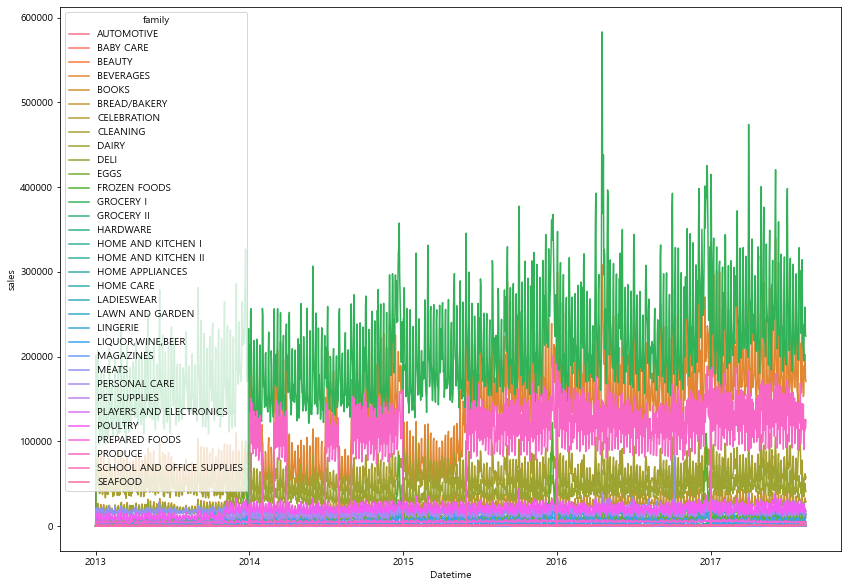

In [32]:
plt.figure(figsize= [14,10])
sns.lineplot(data = p2, x = 'Datetime', y = 'sales', hue = 'family')

In [35]:
# 냉동식품 확인
# 기저귀 데이터 확인
cond1 = (df1['family']=='FROZEN FOODS')


,id,date,store_nbr,family,sales,onpromotion,Datetime,Year,Month,Day,day_of_week
11,11,2013-01-01,1,FROZEN FOODS,0.000,0,2013-01-01,2013,1,1,Tuesday
44,44,2013-01-01,10,FROZEN FOODS,0.000,0,2013-01-01,2013,1,1,Tuesday
77,77,2013-01-01,11,FROZEN FOODS,0.000,0,2013-01-01,2013,1,1,Tuesday
110,110,2013-01-01,12,FROZEN FOODS,0.000,0,2013-01-01,2013,1,1,Tuesday
143,143,2013-01-01,13,FROZEN FOODS,0.000,0,2013-01-01,2013,1,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
3000734,3000734,2017-08-15,54,FROZEN FOODS,32.000,0,2017-08-15,2017,8,15,Tuesday
3000767,3000767,2017-08-15,6,FROZEN FOODS,111.000,1,2017-08-15,2017,8,15,Tuesday
3000800,3000800,2017-08-15,7,FROZEN FOODS,235.351,1,2017-08-15,2017,8,15,Tuesday
3000833,3000833,2017-08-15,8,FROZEN FOODS,158.993,1,2017-08-15,2017,8,15,Tuesday


In [36]:
df2 = df1.loc[cond1]

In [37]:
df_time = pd.pivot_table(
    data = df2
    , 
    index = 'Datetime',
    values = 'sales',
    aggfunc='sum')

df_time.head()

,sales
Datetime,
2013-01-01,29.654999
2013-01-02,7115.388000
2013-01-03,4760.805009
2013-01-04,4525.934004
2013-01-05,5781.605010


In [39]:
# 1일 단위로 묶기
y = df_time['sales'].resample('1D').mean()

In [40]:
# 결측치 확인
print(y.isnull().sum())


4


In [41]:
# 시계열은 결측치를 채워줄 때, 바로 이전의 데이터나 이후의 데이터로 채워주는 것이 좋음 (평균X)
y1 = y.fillna(method = 'ffill')

In [42]:
from pylab import rcParams 

In [43]:
rcParams['figure.figsize'] = 15,10

#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

C:\Users\minsoo\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
c:\ProgramData\Miniconda3\envs\EV_PY39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


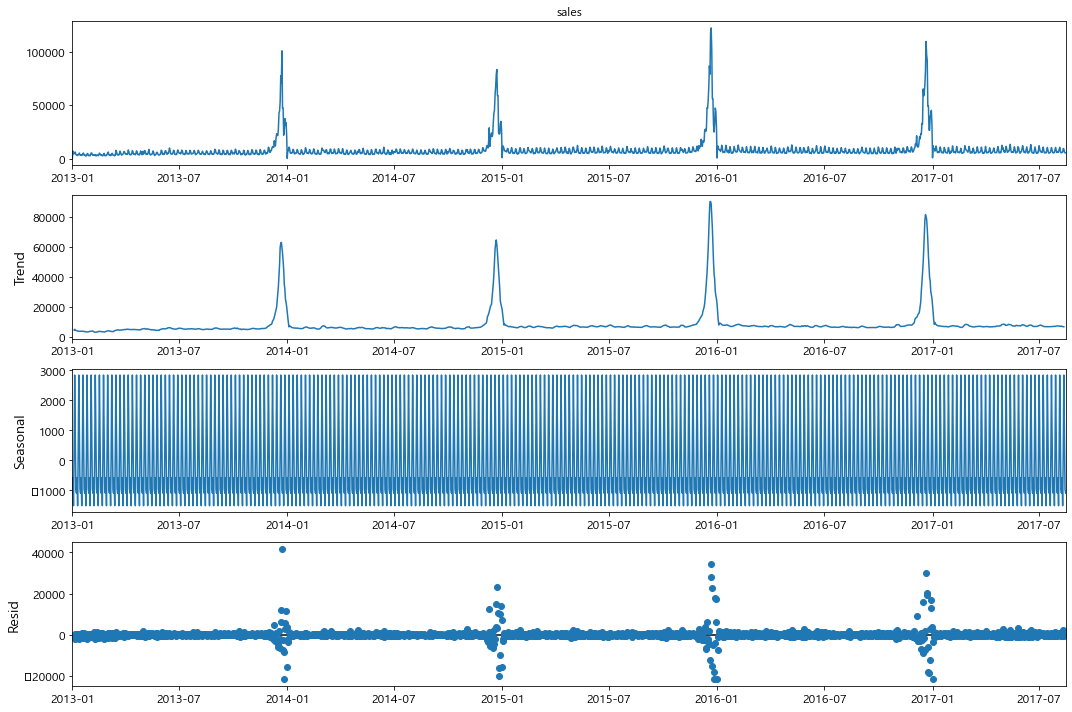

In [44]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y1, model = 'additive')

# 모델 시각화
fig = model_series.plot()
plt.show()